# 1. Cleaning

### Importing Libraries and Data Frames

In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Sklearn imports
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


# DiCE imports
import dice_ml
from dice_ml.utils import helpers  # helper functions

import pickle
from sklearn.metrics import accuracy_score,  recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc

In [3]:
# Load the dataframe from a csv file
df = pd.read_csv('train.csv', delimiter=';')


### Exploring the Data Frames

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

####  Cleaning the target variable and making it binary.

In [7]:
# Replace the values in the target column with string '0' and '1'.
df['y'] = df['y'].str.replace('no', '0')  
df['y'] = df['y'].str.replace('yes', '1')   

# Convert to integer
df['y'] = df['y'].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int32 
dtypes: int32(1), int64(7), object(9)
memory usage: 5.7+ MB


Print count and percentage of classes variable

#### Droping nan values

In [9]:
#Some values are like '?'. Replacing them as NaN 
df[df == '?'] = np.nan
# Dropping the rows with NaN values in  'workclass', 'occupation', 'native-country' for the test dataset
df.dropna( inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int32 
dtypes: int32(1), int64(7), object(9)
memory usage: 5.7+ MB


#### Count and percentage of Target classes values after droping NaN values 


In [11]:
# Calculate the counts of unique values in the 'class' column of 'df_class_feature' and store it in 'class_counts'.
class_counts = df['y'].value_counts()

# Calculate the percentage of each unique value in the 'class' column by dividing 'class_counts' by its sum and then multiplying by 100.
class_percentages = class_counts / class_counts.sum() * 100

print('Class counts:\n' ,class_counts, '\n')
print('Percentage of each class: \n' ,class_percentages)

b = df.shape[0]
print('\nNumber of rows after dropping NaN: ', b)

Class counts:
 0    39922
1     5289
Name: y, dtype: int64 

Percentage of each class: 
 0    88.30152
1    11.69848
Name: y, dtype: float64

Number of rows after dropping NaN:  45211


# 2. Split data into separate fitting and test set

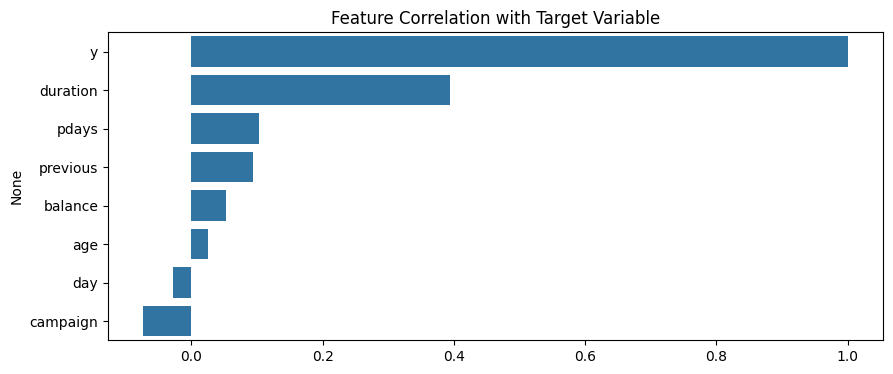

In [12]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr()

# Get correlations with the target variable
target_corr = corr_matrix['y'].sort_values(ascending=False)

# Plot the correlations
plt.figure(figsize=(10, 4))
sns.barplot(x=target_corr.values, y=target_corr.index)
plt.title('Feature Correlation with Target Variable')
plt.show()

In [13]:
#df = df.sample(n=1000, random_state=75)

### Creating X and y sets

In [14]:
df.reset_index(drop=True, inplace=True)

In [15]:
# Creating X and y sets.income is the target variable and native country dropped because it has 41 unique values and occupation is very similar too workclass.
X = df.drop(['y'], axis=1)
y = df['y']

Split the dataset into fitting data (60%) and test set (40%), the reason I chose 60 to 40 split is to have a bigger test set. I did some experiments with other ratios such as 70 to 30 and 80 to 20 and the model performance metrics were almost the same.

In [16]:
X_fit, X_test, y_fit, y_test = train_test_split(X, y, test_size=0.3, random_state=1600)

#### The percentage of each class in the target variable for each set

In [17]:
# Defined a function to calculate  and print the percentage of each class in the target variable
def calculate_class_percentage(y):
    class_percentage = {}
    total_samples = len(y)
    unique_classes = set(y)
    
    for cls in unique_classes:
        class_count = sum(y == cls)
        percentage = (class_count / total_samples) * 100
        class_percentage[cls] = percentage
    
    return class_percentage

In [18]:
# Calculate class percentages for each dataset
fit_class_percentage = calculate_class_percentage(y_fit)
test_class_percentage = calculate_class_percentage(y_test)

# Print class percentages for each dataset
print("Fit set class percentages:")
print(fit_class_percentage )
print("\nTest set class percentages:")
print(test_class_percentage)
print('\n Number of rows of X fit', X_fit.shape[0], '\n Number of rows of X test', X_test.shape[0],'\n Number of rows of Y fit', y_fit.shape[0],'\n Number of rows of y test', y_test.shape[0],)


Fit set class percentages:
{0: 88.07153916642967, 1: 11.928460833570323}

Test set class percentages:
{0: 88.83810085520494, 1: 11.161899144795045}

 Number of rows of X fit 31647 
 Number of rows of X test 13564 
 Number of rows of Y fit 31647 
 Number of rows of y test 13564


# 3. Random Forest and Logistig Regression

In [19]:
# Sklearn imports
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


# DiCE imports
import dice_ml
from dice_ml.utils import helpers  # helper functions

import pickle
from sklearn.metrics import accuracy_score,  recall_score, precision_score, f1_score, roc_auc_score, roc_curve, auc

### Defining Random Forest model


In [20]:
def run_RF (X_fit, y_fit, X_test, y_test, model_name, i, j , k, estimator, depth):
    """
    Trains a Random Forest model and evaluates its performance on the test dataset.

    Parameters:
    X_fit (pandas.DataFrame): The training dataset.
    y_fit (pandas.Series): The target variable of the training dataset.
    X_test (pandas.DataFrame): The test dataset.
    y_test (pandas.Series): The target variable of the test dataset.
    model_name (str): A name for the model to distinguish it in the performance metrics.
    i (int): The number of counterfactuals to be generated for each sample, for the experiment.
    j (int): The sample size to be used for counterfactual generation, for the experiment.
    k (int): The number of iterations to be run for each sample size and CF number combination.

    Returns:
    model_RF (Pipeline): The trained Random Forest model pipeline.
    model_perf_metrics_rf (pandas.DataFrame): The performance metrics of the Random Forest model.
    roc_rf (float): The ROC AUC score of the Random Forest model.
    f1_rf (float): The F1 score of the Random Forest model.
    """    
    # Preprocessing for cataegorical data - OneHotEncoding
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])
        # Preprocessing for numerical data - StandardScaler
    numerical_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])
    
    # Bundle preprocessing for data
    transformations = ColumnTransformer(
        transformers=[            
            ('num', numerical_transformer, numerical),  
            ('cat', categorical_transformer, categorical)],
        remainder='passthrough')
    
    # Define the Random Forest model
    clf_RF = Pipeline(steps=[('preprocessor', transformations), ('classifier', RandomForestClassifier())])
    # Run the random forest model
    model_RF = clf_RF.fit(X_fit, y_fit)
    # Predict on the test dataset
    y_pred_rf = model_RF.predict(X_test)
    # Calculate the needed model performance metrics
    f1_rf = f1_score(y_test, y_pred_rf)
    roc_rf = roc_auc_score(y_test, y_pred_rf)
    a = len(X_fit)
    # Saving the model performance metrics
    models_rf = [('RF_{}'.format(model_name), k, j, i, a, f1_rf, roc_rf, 0, 0)]
    # Saving the model performance metrics in a dataframe
    model_perf_metrics_rf = pd.DataFrame(models_rf, columns = ['Model', 'Iteration', 'Sample Size', 'CF Num', 'X_fit Size',  'F1 (%)', 'AUC (%)', 'F1 (%)_std', 'AUC (%)_std'])
        
    return model_RF, model_perf_metrics_rf, roc_rf, f1_rf

### Defining Logistic Regression model


In [21]:
def run_LR(X_fit, y_fit, X_test, y_test, model_name, i, j , k):
    """
    Trains a Logistic Regression model and evaluates its performance on the test dataset.

    Parameters:
    X_fit (pandas.DataFrame): The training dataset.
    y_fit (pandas.Series): The target variable of the training dataset.
    X_test (pandas.DataFrame): The test dataset.
    y_test (pandas.Series): The target variable of the test dataset.
    model_name (str): A name for the model to distinguish it in the performance metrics.
    i (int): The number of counterfactuals to be generated for each sample, for the experiment.
    j (int): The sample size to be used for counterfactual generation, for the experiment.
    k (int): The number of iterations to be run for each sample size and CF number combination.

    Returns:
    model_perf_metric_lr (pandas.DataFrame): The performance metrics of the Logistic Regression model.
    roc_lr (float): The ROC AUC score of the Logistic Regression model.
    f1_lr (float): The F1 score of the Logistic Regression model.
    """    
    # Preprocessing for categorical data - OneHotEncoding
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])

    # Preprocessing for numerical data - StandardScaler
    numerical_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])

    # Bundle preprocessing for numerical and categorical data
    transformations = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical),  
            ('cat', categorical_transformer, categorical)], 
        remainder='passthrough')

    # Define the Logistic Regression model
    clf_LR = Pipeline(steps=[('preprocessor', transformations), ('classifier', LogisticRegression(max_iter=1000))])
    # Run the Logistic Regression model
    model_LR = clf_LR.fit(X_fit, y_fit)
    # Predict on the test dataset
    y_pred_lr = model_LR.predict(X_test)
    # Calculate the needed model performance metrics
    f1_lr = f1_score(y_test, y_pred_lr)
    roc_lr = roc_auc_score(y_test, y_pred_lr)
    a = len(X_fit)

    # Saving the model performance metrics
    models_lr = [('LR_{}'.format(model_name), k, j, i, a, f1_lr, roc_lr, 0, 0)]
    # Saving the model performance metrics in a dataframe
    model_perf_metric_lr = pd.DataFrame(models_lr, columns = ['Model', 'Iteration', 'Sample Size', 'CF Num','X_fit Size', 'F1 (%)', 'AUC (%)', 'F1 (%)_std', 'AUC (%)_std'])

    return  model_perf_metric_lr, roc_lr, f1_lr

### Default Decision Tree

In [22]:

def run_DT(X_fit, y_fit, X_test, y_test, model_name, i, j , k):
    # Preprocessing for cataegorical data - OneHotEncoding
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])
        # Preprocessing for numerical data - StandardScaler
    #numerical_transformer = Pipeline(steps=[
        #('scaler', StandardScaler())])
    
    # Bundle preprocessing for data
    transformations = ColumnTransformer(
        transformers=[            
            #('num', numerical_transformer, numerical),  
            ('cat', categorical_transformer, categorical)],
        remainder='passthrough')
    
        # Initialize the decision tree classifier
    clf_DT = Pipeline(steps=[('preprocessor', transformations), ('classifier', DecisionTreeClassifier())])
    
    # Train the classifier using the fit data
    model_DT = clf_DT.fit(X_fit, y_fit)
    # Make predictions on the test data
    y_pred_dt = model_DT.predict(X_test)

    # Calculate the needed model performance metrics
    f1_dt = f1_score(y_test, y_pred_dt)
    roc_dt = roc_auc_score(y_test, y_pred_dt)
    a = len(X_fit)

    # Saving the model performance metrics
    models_dt = [('DT_{}'.format(model_name), k, j, i, a, f1_dt, roc_dt, 0, 0)]
    # Saving the model performance metrics in a dataframe
    model_perf_metrics_dt = pd.DataFrame(models_dt, columns = ['Model', 'Iteration', 'Sample Size', 'CF Num', 'X_fit Size',  'F1 (%)', 'AUC (%)', 'F1 (%)_std', 'AUC (%)_std'])
        
    return model_perf_metrics_dt, roc_dt, f1_dt

### Running the default models one time and saving the performance metrics

In [23]:
def run_models_and_merge_metrics(X_fit, y_fit, X_test, y_test):
    """
    Trains Random Forest and Logistic Regression models on the given training data,evaluates their performance on the test data, and merges their performance metrics into two dataframes.

    Parameters:
    X_fit (DataFrame): Features for training the models.
    y_fit (Series): Target variable for training the models.
    X_test (DataFrame): Features for testing the models.
    y_test (Series): Target variable for testing the models.

    Returns:
    tuple: 
        - model_RF (RandomForestClassifier): The trained Random Forest model.
        - model_perf_metrics_merged (DataFrame): Dataframe containing merged performance metrics of the Random Forest and Logistic Regression models.
        - model_perf_metrics_merged_only_with_cfs (DataFrame): Another dataframe containing merged performance metrics, identical to the first but intended for use with a counterfactuals dataset.
    """
   
    # Running default Random Forest Once
    model_RF, model_perf_metric_rf, roc_rf, f1_rf = run_RF(X_fit, y_fit, X_test, y_test, 'default', 0, 0, 0, 100, None)
    
    model_perf_metric_rf_simp, roc_rf, f1_rf = run_LR(X_fit, y_fit, X_test, y_test, 'default', 0, 0, 0)
    # Running default Logistic Regression Once
    model_perf_metric_lr, auc, f1 = run_DT(X_fit, y_fit, X_test, y_test, 'default', 0, 0, 0)
    
    # Merging the default model performance metrics in a dataframe to accommodate new models, and doing it twice to use the second one on only CFs dataset.
    model_perf_metrics_merged = model_perf_metric_rf.merge(model_perf_metric_lr, how='outer').merge(model_perf_metric_rf_simp, how='outer')
    model_perf_metrics_merged_only_with_cfs = model_perf_metric_rf.merge(model_perf_metric_lr, how='outer').merge(model_perf_metric_rf_simp, how='outer')
    
    return model_RF, model_perf_metrics_merged, model_perf_metrics_merged_only_with_cfs


### Running the default models multiple times and saving the performance metrics

In [24]:
def mean_of_default_models (k):
    """
    Computes the mean and standard deviation of model performance metrics for default Random Forest and Logistic Regression models over multiple iterations.

    Parameters:
    k (int): The number of iterations to run the models for calculating the mean and standard deviation.

    Returns:
    model_perf_metrics_mean_of_iterations_only_with_cfs (pandas.DataFrame): DataFrame containing the mean and standard deviation of performance metrics for Random Forest and Logistic Regression models trained only on CFs.
    model_perf_metrics_mean_of_iterations (pandas.DataFrame): DataFrame containing the mean and standard deviation of performance metrics for Random Forest and Logistic Regression models trained on original data.
    """
    total_auc_rf = []
    total_f1_rf = []    
    total_auc_rf_sim = []
    total_f1_rf_sim = []
    total_auc_lr = []
    total_f1_lr = []
    
    for k in range(0, k):    
        #Running default RF and LR
        _, _ ,auc_def_rf,f1_def_rf = run_RF(X_fit, y_fit, X_test, y_test, 'default', 0 , 0 , 0, 100, None)
        _ ,auc_def_rf_sim,f1_def_rf_sim = run_LR(X_fit, y_fit, X_test, y_test, 'default', 0 , 0 , 0) 
        _ , auc_def_lr, f1_def_lr = run_DT(X_fit, y_fit, X_test, y_test, 'default', 0 , 0 , 0)
        
        # Creating a list appending the auc and f1 scores of each iteration to calculate mean in at the end of the iterations.
        total_auc_rf.append(auc_def_rf)
        total_auc_rf_sim.append(auc_def_rf_sim)
        total_auc_lr.append(auc_def_lr)
        total_f1_rf.append(f1_def_rf)
        total_f1_rf_sim.append(f1_def_rf_sim)
        total_f1_lr.append(f1_def_lr)
    else:
        # Means            
        total_auc_rf_mean = np.mean(total_auc_rf)
        total_f1_rf_mean = np.mean(total_f1_rf)
        
        total_auc_rf_sim_mean = np.mean(total_auc_rf_sim)
        total_f1_rf_sim_mean = np.mean(total_f1_rf_sim)

        total_auc_lr_mean = np.mean(total_auc_lr)
        total_f1_lr_mean = np.mean(total_f1_lr)

        # Standart  deviations
        total_auc_rf_std = round(np.std(total_auc_rf),8)
        total_f1_rf_std = round(np.std(total_f1_rf),8)
        
        total_auc_rf_sim_std = round(np.std(total_auc_rf_sim),8)
        total_f1_rf_sim_std = round(np.std(total_f1_rf_sim),8)

        total_auc_lr_std = round(np.std(total_auc_lr),8)
        total_f1_lr_std = round(np.std(total_f1_lr),8)

        c = len(X_fit)
        
        model_perf_metrics_mean_of_iterations_only_with_cfs = pd.DataFrame()
        model_perf_metrics_mean_of_iterations = pd.DataFrame()

        default_RF_means_row = {'Model': 'RF_default_mean_of_iterations', 'Iteration': k+1, 'Sample Size': 0, 'CF Num': 0, 'X_fit Size':c ,
        'F1 (%)': total_f1_rf_mean, 'F1 (%)_std':total_f1_rf_std, 'AUC (%)' :total_auc_rf_mean, 'AUC (%)_std': total_auc_rf_std}
        
        model_perf_metrics_mean_of_iterations_only_with_cfs = model_perf_metrics_mean_of_iterations_only_with_cfs.append(default_RF_means_row, ignore_index=True)
        model_perf_metrics_mean_of_iterations = model_perf_metrics_mean_of_iterations.append(default_RF_means_row, ignore_index=True)   

        simple_RF_means_row = {'Model': 'LR_default_mean_of_iterations', 'Iteration': k+1, 'Sample Size': 0, 'CF Num': 0, 'X_fit Size':c ,
        'F1 (%)': total_f1_rf_sim_mean, 'F1 (%)_std':total_f1_rf_sim_std, 'AUC (%)' :total_auc_rf_sim_mean, 'AUC (%)_std': total_auc_rf_sim_std}
        
        model_perf_metrics_mean_of_iterations_only_with_cfs = model_perf_metrics_mean_of_iterations_only_with_cfs.append(simple_RF_means_row, ignore_index=True)
        model_perf_metrics_mean_of_iterations = model_perf_metrics_mean_of_iterations.append(simple_RF_means_row, ignore_index=True)   
       
        default_LR_means_row = {'Model': 'DT_default_mean_of_iterations', 'Iteration': k+1, 'Sample Size': 0, 'CF Num': 0, 'X_fit Size':c ,
        'F1 (%)': total_f1_lr_mean, 'F1 (%)_std':total_f1_lr_std, 'AUC (%)' :total_auc_lr_mean, 'AUC (%)_std': total_auc_lr_std}

        model_perf_metrics_mean_of_iterations_only_with_cfs = model_perf_metrics_mean_of_iterations_only_with_cfs.append(default_LR_means_row, ignore_index=True)
        model_perf_metrics_mean_of_iterations = model_perf_metrics_mean_of_iterations.append(default_LR_means_row, ignore_index=True)
    
        return model_perf_metrics_mean_of_iterations_only_with_cfs, model_perf_metrics_mean_of_iterations

### Calculating the means and standart deviations of multiple iterations

In [25]:
def calculate_means_and_stds(total_auc_cf, total_f1_cf, total_auc, total_f1, i, j, k, a, b):
    """
    Calculates the mean and standard deviation of model performance metrics for each iterations and constructs summary rows for inclusion in a DataFrame.

    Parameters:
    total_auc_cf (list): AUC scores for models trained only on counterfactuals across iterations.
    total_f1_cf (list): F1 scores for models trained only on counterfactuals across iterations.
    total_auc (list): AUC scores for models trained on original data plus counterfactuals across iterations.
    total_f1 (list): F1 scores for models trained on original data plus counterfactuals across iterations.
    i (int): The number of counterfactuals to be generated for each sample, for the experiment.
    j (int): The sample size to be used for counterfactual generation, for the experiment.
    k (int): The number of iterations to be run for each sample size and CF number combination.
    a (int): The size of the training dataset including original data plus counterfactuals.
    b (int): The size of the training dataset with only counterfactuals.

    Returns:
    new_row (dict): A dictionary containing the mean and standard deviation of performance metrics for models trained on original data plus counterfactuals.
    new_row_cf (dict): A dictionary containing the mean and standard deviation of performance metrics for models trained only on counterfactuals.
    """
        
    total_auc_only_cf_mean = np.mean(total_auc_cf)
    total_f1_only_cf_mean = np.mean(total_f1_cf)

    total_auc_mean = np.mean(total_auc)
    total_f1_mean = np.mean(total_f1)

    #Standart  deviations
    total_auc_only_cf_std = round(np.std(total_auc_cf),8)
    total_f1_only_cf_std = round(np.std(total_f1_cf),8)

    total_auc_std = round(np.std(total_auc),8)
    total_f1_std = round(np.std(total_f1),8)
    
    new_row   = {'Model': 'DT_sample:{}_cf:{}_mean_of_{}_iterations'.format(j, i, k), 'Iteration': k, 'Sample Size': j, 'CF Num': i, 'X_fit Size':a ,
                             'F1 (%)': total_f1_mean, 'F1 (%)_std':total_f1_std, 'AUC (%)' :total_auc_mean, 'AUC (%)_std': total_auc_std}
 
                # Creating new rows to save the model performance metrics of each sample size and CF number combination's all iterations
    new_row_cf= {'Model': 'DT_sample:{}_cf:{}_mean_of_{}_iterations_only_cf'.format(j, i, k) , 'Iteration': k, 'Sample Size': j, 'CF Num': i, 'X_fit Size':b , 
                             'F1 (%)': total_f1_only_cf_mean, 'F1 (%)_std': total_f1_only_cf_std, 'AUC (%)' :total_auc_only_cf_mean, 'AUC (%)_std': total_auc_only_cf_std}
    return new_row, new_row_cf

# 4. Plots

In [26]:
def distrubution_plot(df, name, true_false_1, true_false_2):
    """
    This function plots the distribution of scores for a given model.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the model performance data.
    name (str): The list of the Scores that will be plotted.
    1st True False is a flag to determine if the data is mean of iterations or not.
    2nd True False is a flag to determine if the data is only CFs or CFs + original data.    
    """
    # Get the default values of the models
    lr_line = df[df['Model'].str.startswith('DT_default')][name].iloc[0]
    rf_line = df[df['Model'].str.startswith('RF_default')][name].iloc[0]
    #sim_rf_line = df[df['Model'].str.startswith('LR_default')][name].iloc[0]

    df = df[(df['Model'] != 'RF_default') & (df['Model'] != 'DT_default')& (df['Model'] != 'LR_default')]
    df = df[(df['Model'] != 'RF_default_mean_of_iterations') & (df['Model'] != 'DT_default_mean_of_iterations') & (df['Model'] != 'LR_default_mean_of_iterations')]

    # Get the sample size, CF Num and Iteration values    
    x = df['Sample Size'].unique()
    x_2 = df['CF Num'].unique()
    x_3 = df['Iteration'].unique()

    # Get the y values
    y = df[name]
    y_err = df[name+'_std']
    # combine x and x_2 for x-axis labels
    combined_x = [f"{i}_{j}_{k}" for i in x for j in x_2 for k in x_3]

    # plot lines
    plt.figure(figsize=(25,10))

    
    # 1st True False is a flag to determine if the data is mean of iterations or not. True = mean of iterations
    # 2nd True False is a flag to determine if the data is only CFs or CFs + original data. True = only CFs
    if true_false_1 is True:
        plt.scatter(combined_x, y, color="blue")
        plt.errorbar(combined_x, y, yerr=y_err, fmt='o', color="blue",  capsize=6, label="{} Values".format(name))

        plt.axhline(y=rf_line, color='r', linestyle='--', label="Default_RF_Line_Mean_of_{}".format(x_3))  # Plot RF_line as a horizontal line
        plt.axhline(y=lr_line, color='green', linestyle='--', label="Default_DT_line_Mean_of_{}".format(x_3))  # Plot LR_line as a horizontal line

        plt.ylabel('{} score'.format(name))
        plt.xlabel('Sample Size- CF Num- Iteration')
        plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1.155))
        plt.xticks(rotation=40)  # rotate x-axis labels for better visibility        
        
        if true_false_2 is True:
            plt.title('Distribution of {} Scores of Models\n Trained on CFs\nSample: {} - CF: {}\n Mean of {} iterations'.format(name,x, x_2, x_3))
            plt.savefig(f"Plots/Plot_of_{name}_Score_onlyCFs_Sample_{x}_CF_{x_2}_mean_of_{x_3}_iterations.svg", format='svg')    
        else:
            plt.title('Distribution of {} Scores \n Trained on CFs + Original set\n Sample: {} - CF: {}\n Mean of {} iterations'.format(name,x, x_2, x_3))
            plt.savefig(f"Plots/Plot_of_{name}_Score_Sample_{x}_CF_{x_2}_mean_of_{x_3}_iterations.svg", format='svg')    
    else:
        plt.plot(combined_x, y, 'o-', color="blue", label="{} Values".format(name))
        
        plt.axhline(y=rf_line, color='r', linestyle='--', label="Default_RF_Line")  # Plot RF_line as a horizontal line
        plt.axhline(y=lr_line, color='green', linestyle='--', label="Default_DT_line")  # Plot LR_line as a horizontal line

        plt.ylabel('{} score'.format(name))
        plt.xlabel('Sample Size- CF Num- Iteration')
        plt.legend(loc='upper right', bbox_to_anchor=(1.05, 1.155))
        plt.xticks(rotation=40)  # rotate x-axis labels for better visibility    

        if true_false_2 is True:
            plt.title('Distribution of {} Scores of Models \nTrained on CFs\nSample: {} - CF: {}'.format(name, x, x_2))
            plt.savefig(f"Plots/Plot_of_{name}_Score_onlyCFs_Sample_{x}_CF_{x_2}.svg", format='svg')
        else:    
            plt.title('Distribution of {} Scores \n Trained on CFs + Original set\n Sample: {} - CF: {}'.format(name, x, x_2))
            plt.savefig(f"Plots/Plot_of_{name}_Score_Sample_{x}_CF_{x_2}.svg", format='svg')
            
    #plt.show()

# 5. Counterfactuals

### Defining the DICE model. Possible adjustments that can be made are, 
- which model to use for CF generation, 
- continuous features, 
- size of the sample that will be used to create the CFs, 
- how many CFs to generate per one sample,
- which features can vary in the CF generation process.

In [27]:
# Defining DICE model
def generate_counterfactuals(X_fit, y_fit, model, sample_size, total_CFs, fea_to_vary, outcome_name, k,continuous_features ):
    """
    Generates counterfactual examples using the DICE (Diverse Counterfactual Explanations) method.

    Parameters:
    X_fit (pandas.DataFrame): The training dataset.
    y_fit (pandas.Series): The target variable of the training dataset.
    model (object): The machine learning model for which counterfactuals are to be generated.
    sample_size (int): The number of samples for which to generate counterfactuals.
    total_CFs (int): The total number of counterfactuals to generate per sample.
    fea_to_vary (list): The list of features to be varied in the counterfactual generation process.
    outcome_name (str): The name of the outcome variable.
    k (int): The number of iterations to be run for each sample size and CF number combination.

    Returns:
    X_fit_cf (pandas.DataFrame): The feature set of the generated counterfactuals.
    y_fit_cf (pandas.Series): The target variable of the generated counterfactuals.
    cf_df (pandas.DataFrame): A dataframe containing all the generated counterfactuals.
    """
    all_columns = X_fit.columns
    # Calculate the original class distribution
    class_0_count = np.sum(y_fit == 0)
    class_1_count = np.sum(y_fit == 1)

    # Calculate the opposite class distribution proportions
    total_count = class_0_count + class_1_count
    prop_class_0 = class_1_count / total_count
    prop_class_1 = class_0_count / total_count

    # Determine the number of samples for each class in the opposite distribution
    total_samples = sample_size
    num_class_0_samples = int(total_samples * prop_class_0)
    num_class_1_samples = total_samples - num_class_0_samples  # Ensuring total is 1000

    # Sample from each class to get the opposite distribution
    X_class_0 = X_fit[y_fit == 0]
    X_class_1 = X_fit[y_fit == 1]

    y_class_0 = y_fit[y_fit == 0]
    y_class_1 = y_fit[y_fit == 1]

    # Sample the required number of samples from each class
    X_class_0_sampled, _, y_class_0_sampled, _ = train_test_split(X_class_0, y_class_0, train_size=num_class_0_samples, random_state=42)
    X_class_1_sampled, _, y_class_1_sampled, _ = train_test_split(X_class_1, y_class_1, train_size=num_class_1_samples, random_state=42)
    # Convert the sampled numpy arrays back to DataFrames
    X_class_0_sampled_df = pd.DataFrame(X_class_0_sampled, columns=all_columns)
    X_class_1_sampled_df = pd.DataFrame(X_class_1_sampled, columns=all_columns)

    # Concatenate DataFrames
    X_fit = pd.concat([X_class_0_sampled_df, X_class_1_sampled_df], ignore_index=True)
    # Assuming y_class_0_sampled, y_class_1_sampled are numpy arrays with single column
    y_fit = pd.DataFrame(np.concatenate([y_class_0_sampled, y_class_1_sampled]), columns=[outcome_name])
    
    # Optionally, shuffle the dataset to mix the classes
    X_fit, y_fit = shuffle(X_fit, y_fit, random_state=42)
    # Create a Dice-ML data object
    d = dice_ml.Data(dataframe=X_fit.assign(y=y_fit), continuous_features=continuous_features, outcome_name=outcome_name)
    # Creating a Model object
    m = dice_ml.Model(model=model, backend="sklearn")
    # Creating the DICE model with data and model object 
    exp = dice_ml.Dice(d, m, method="random")

    # Execution of the DICE model to generate counterfactuals
    e1 = exp.generate_counterfactuals(X_fit, total_CFs=total_CFs, desired_class="opposite", features_to_vary= fea_to_vary)
    
    # Comment out the below line as CFs needed to be visualized in the notebook
    #e1.visualize_as_dataframe(show_only_changes=True)

    # Creating a new empty dataframe to store the generated CFs
    cf_df = pd.DataFrame()
    # For loop to append the counterfactuals of each sample, to a dataframe
    for i in range(0, sample_size):
        # Saving CFs
        xd = e1.cf_examples_list[i].final_cfs_df
        # Adding the generated CFs to the empty dataframe
        cf_df = pd.concat([cf_df, xd])
# If the sample size is reached and the CFs are generated for all the samples, followiing code resets the index of the dataframe and saves the generated CFs as a csv file.
    else:
        # Resetting the index of the dataframe to not have duplicate index number
        cf_df.reset_index(drop=True, inplace=True)
        new_start_index = len(X_fit) + i + len(cf_df)
        cf_df.index += new_start_index 
        # Saving the generated CFs as a csv file
        cf_df.to_csv('Generated_CFs/cf_df_{}_{}_{}.csv'.format(sample_size, total_CFs,k ))
        
        # Following code creates X and y fit sets for the generated CFs and returns them for further use.
        X_fit_cf = cf_df.drop([outcome_name], axis=1)
        y_fit_cf = cf_df[outcome_name]

    return X_fit_cf, y_fit_cf, cf_df

# Defining a experiment  fuction that runs the RF and LR, DICE model that generates counterfactuals, and then using those CFs for more model traning. 
#### Then the function saves these CF explanations into a dataframe and trains the LR again with the generated CFs. At the same time, model appends the original fit-set to CF dataset and trains the LR again with the combined version of the datasets. For each model training, LR model function appends the new model performance metrics into a dataframe. Possible adjustments that can be made are, 
- continuous features, 
- size of the sample that will be used to create the CFs, 
- how many CFs to generate per one sample,
- how many iterations will be made for each sample_size and CF_number pair,
- which features can vary in the CF generation process.

In [28]:
# Experiment running function
def running_exp (X_fit, y_fit, X_test, y_test, sample_size_list, total_CFs_list, iteration_num, fea_to_vary, name_of_the_exp, list_of_models, target_variable):
    """
    This function is for running the experiments with different sample sizes, CF numbers and iterations.

    Parameters:
    X_fit (pandas.DataFrame): The training dataset.
    y_fit (pandas.Series): The target variable of the training dataset.
    X_test (pandas.DataFrame): The test dataset.
    y_test (pandas.Series): The target variable of the test dataset.
    continuous_features (list): The list of continuous features in the dataset.
    sample_size_list (list): The list of sample sizes to be used in the experiments.
    total_CFs_list (list): The list of total CF numbers to be generated for each sample size.
    iteration_num (int): The number of iterations to be run for each sample size and CF number combination.
    fea_to_vary (list): The list of features to be varied in the CF generation process. Other features will be kept constant.
    num (int): The number to be added to the file names to distinguish the results of different experiments.
    list_of_models (list): The names of the Scores to be plotted. For example, AUC or F1.

    Returns:
    model_perf_metrics_merged_with_for_cfs (pandas.DataFrame): The model performance metrics of the experiments trained with only CFs.
    model_perf_metrics_merged (pandas.DataFrame): The model performance metrics of the experiments trained with CFs and original data.
    new_cf_df (pandas.DataFrame): All generated CFs in every CF number, sample size and iterations.
    """
    new_cf_df = pd.DataFrame()

    # Running the default Random Forest and Logistic Regression models once and merging their performance metrics in a dataframe.
    model_RF, model_perf_metrics_merged, model_perf_metrics_merged_only_with_cfs = run_models_and_merge_metrics(X_fit, y_fit, X_test, y_test)
    
    # Running the default RF and LR models for multiple iterations to calculate the mean and standard deviation of the performance metrics.
    model_perf_metrics_mean_of_iterations_only_with_cfs, model_perf_metrics_mean_of_iterations = mean_of_default_models (iteration_num)
    
    # Saving these new rows to the model performance metrics dataframes    
    # Loop through different sample sizes
    for j in sample_size_list:
        # Loop through different total CF numbers
        for i in total_CFs_list:
            # Initializing empty lists for saving auc and f1 scores for each iteration
            total_f1_cf = []
            total_f1 = []
            total_auc_cf = []
            total_auc = []

            # Loop through iteration numbers, doing a new experiment for each sample_size and CF_number combination
            for k in range(1,iteration_num+1):    
                xdxd = pd.read_csv('Generated_CFs/cf_df_{}_{}_{}.csv'.format(j, i, k), index_col=0)
                X_fit_cf = xdxd.drop([outcome_name], axis=1)
                y_fit_cf = xdxd[outcome_name]   
                
                new_X_fit = pd.concat([X_fit, X_fit_cf])
                new_y_fit = pd.concat([y_fit, y_fit_cf])

                # Running the Logistic Regression model on the CFs dataset and the dataset with original X_fit plus CFs.
                model_perf_metric_lr_only_cf, auc_only_cf, f1_only_cf = run_DT(X_fit_cf, y_fit_cf, X_test, y_test, 'sample:{}_cf:{}_iteration:{}'.format(j, i, k), i , j , k)
                model_perf_metric_lr_cf_org, auc_lr_cf, f1_lr_cf = run_DT(new_X_fit, new_y_fit, X_test, y_test, 'sample:{}_cf:{}_iteration:{}'.format(j, i, k), i , j , k)                
             
                # Creating a list appending the auc and f1 scores of each iteration to calculate mean in at the end of the iterations.
                total_f1_cf.append(f1_only_cf)
                total_f1.append(f1_lr_cf)
                total_auc_cf.append(auc_only_cf)
                total_auc.append(auc_lr_cf)

                # Saving the model performance metrics of each iteration
                model_perf_metrics_merged_only_with_cfs = model_perf_metrics_merged_only_with_cfs.append(model_perf_metric_lr_only_cf, ignore_index=True)
                model_perf_metrics_merged = model_perf_metrics_merged.append(model_perf_metric_lr_cf_org, ignore_index=True)
                
            else:
            # Calculate means and standard deviations of auc and f1 scores of all the iterations for each sample size and CF number combination
                a = len(new_X_fit)
                b = len(X_fit_cf)

                new_row, new_row_cf = calculate_means_and_stds(total_auc_cf, total_f1_cf, total_auc, total_f1, i, j, k, a, b)
            
                # Saving these new rows to the model performance metrics dataframes    
                model_perf_metrics_mean_of_iterations_only_with_cfs = model_perf_metrics_mean_of_iterations_only_with_cfs.append(new_row_cf, ignore_index=True)
                model_perf_metrics_mean_of_iterations = model_perf_metrics_mean_of_iterations.append(new_row, ignore_index=True)
                
    # Saving the model performance metrics of each iteration as excel files after all the experiments are done.
    model_perf_metrics_merged_only_with_cfs.to_excel('Performance_metrics/model_perf_metrics_merged_only_with_cfs_{}.xlsx'.format(name_of_the_exp))
    model_perf_metrics_merged.to_excel('Performance_metrics/model_perf_metrics_merged_{}.xlsx'.format(name_of_the_exp))
    # Saving the MEAN model performance metrics of each iteration as excel files after all the experiments are done.
    model_perf_metrics_mean_of_iterations_only_with_cfs.to_excel('Performance_metrics/model_perf_metrics_mean_of_iterations_only_with_cfs_{}.xlsx'.format(name_of_the_exp))
    model_perf_metrics_mean_of_iterations.to_excel('Performance_metrics/model_perf_metrics_mean_of_iterations_{}.xlsx'.format(name_of_the_exp))
    
    for k in list_of_models:
        # k is the list of the Scores to be plotted
        # 1st True False is a flag to determine if the data is mean of iterations or not. True = mean of iterations
        # 2nd True False is a flag to determine if the data is only CFs or CFs + original data. True = only CFs'''
        distrubution_plot(model_perf_metrics_merged, k, False, False )
        distrubution_plot(model_perf_metrics_merged_only_with_cfs, k, False, True )

        distrubution_plot(model_perf_metrics_mean_of_iterations, k, True , False)
        distrubution_plot(model_perf_metrics_mean_of_iterations_only_with_cfs, k, True, True )
        
    return  model_perf_metrics_merged_only_with_cfs, model_perf_metrics_merged, new_cf_df

In [32]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31647 entries, 43998 to 25767
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        31647 non-null  int64 
 1   job        31647 non-null  object
 2   marital    31647 non-null  object
 3   education  31647 non-null  object
 4   default    31647 non-null  object
 5   balance    31647 non-null  int64 
 6   housing    31647 non-null  object
 7   loan       31647 non-null  object
 8   contact    31647 non-null  object
 9   day        31647 non-null  int64 
 10  month      31647 non-null  object
 11  duration   31647 non-null  int64 
 12  campaign   31647 non-null  int64 
 13  pdays      31647 non-null  int64 
 14  previous   31647 non-null  int64 
 15  poutcome   31647 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.1+ MB


In [30]:
# Defining the columns' categories
numerical = ['age' ,'balance','day','duration','campaign','pdays','previous']
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
continuous_features = ['balance']

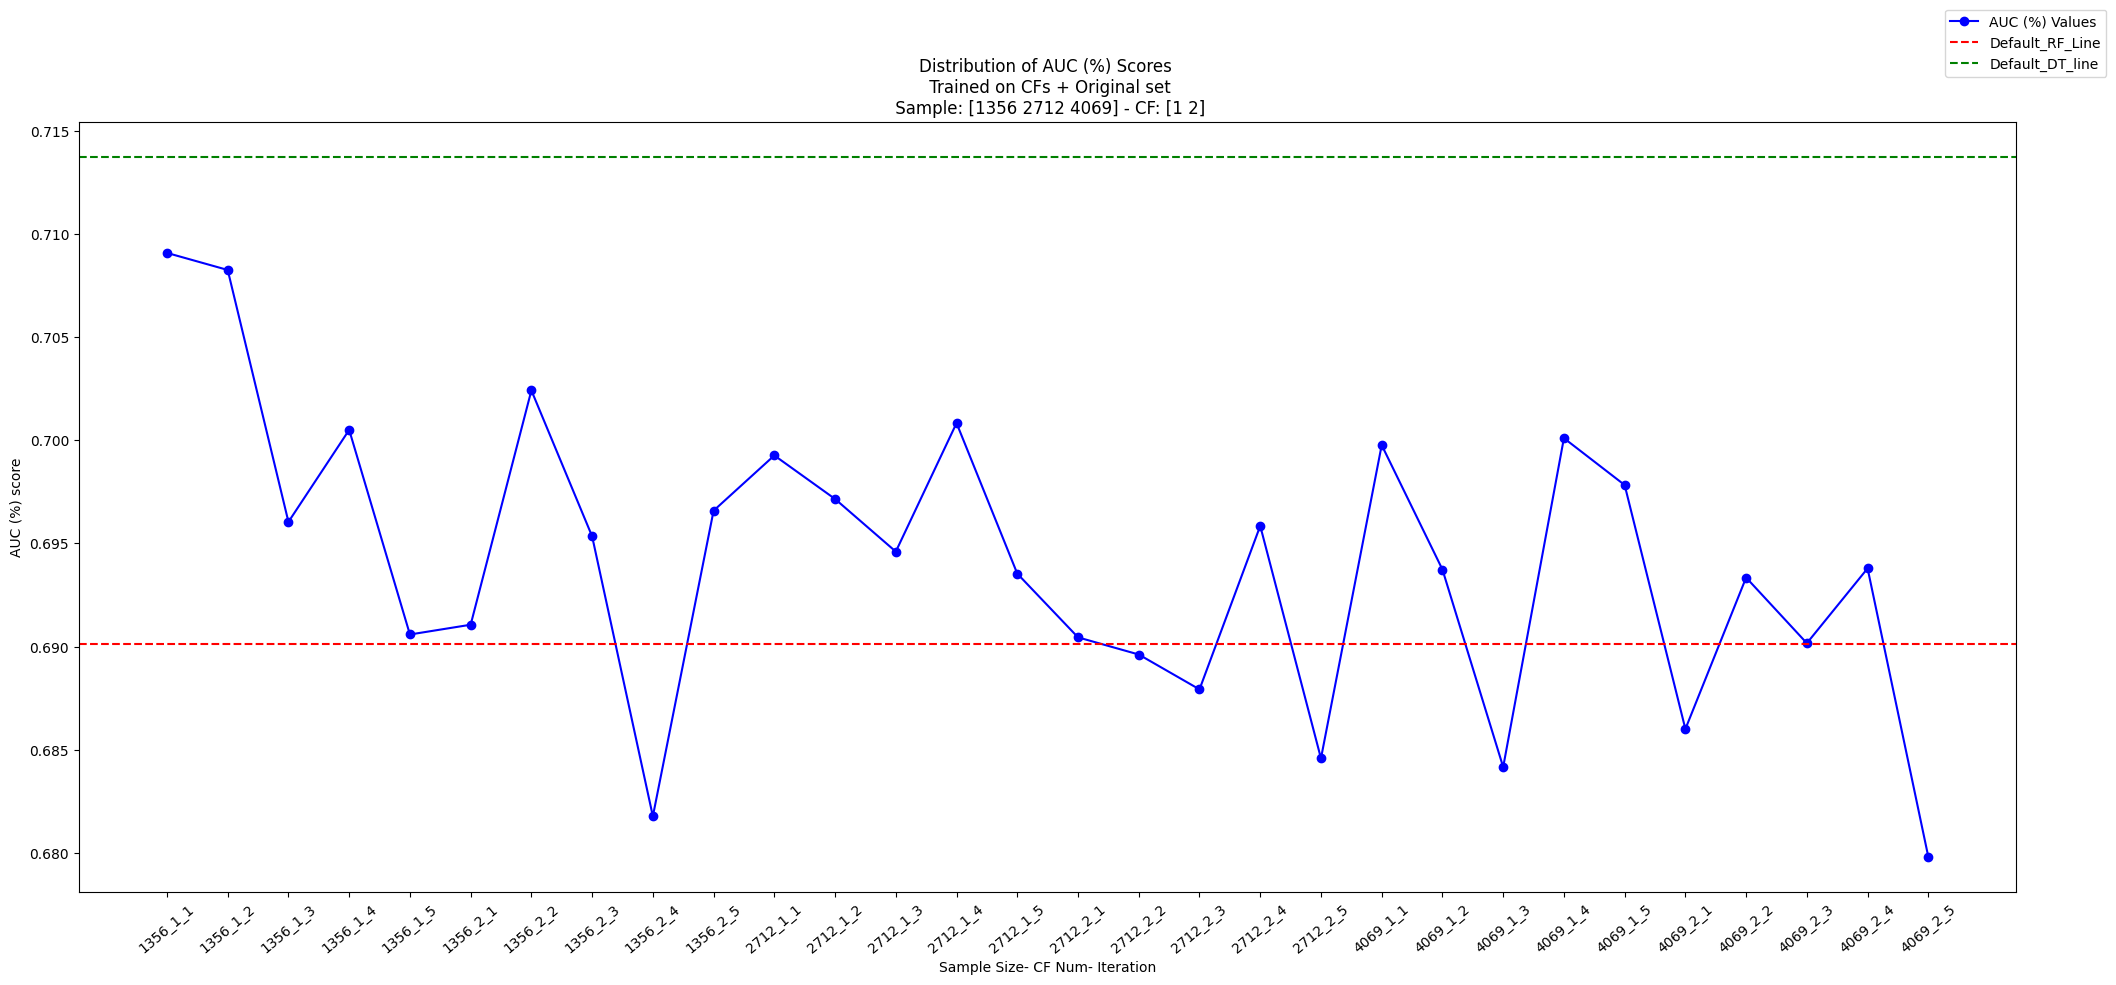

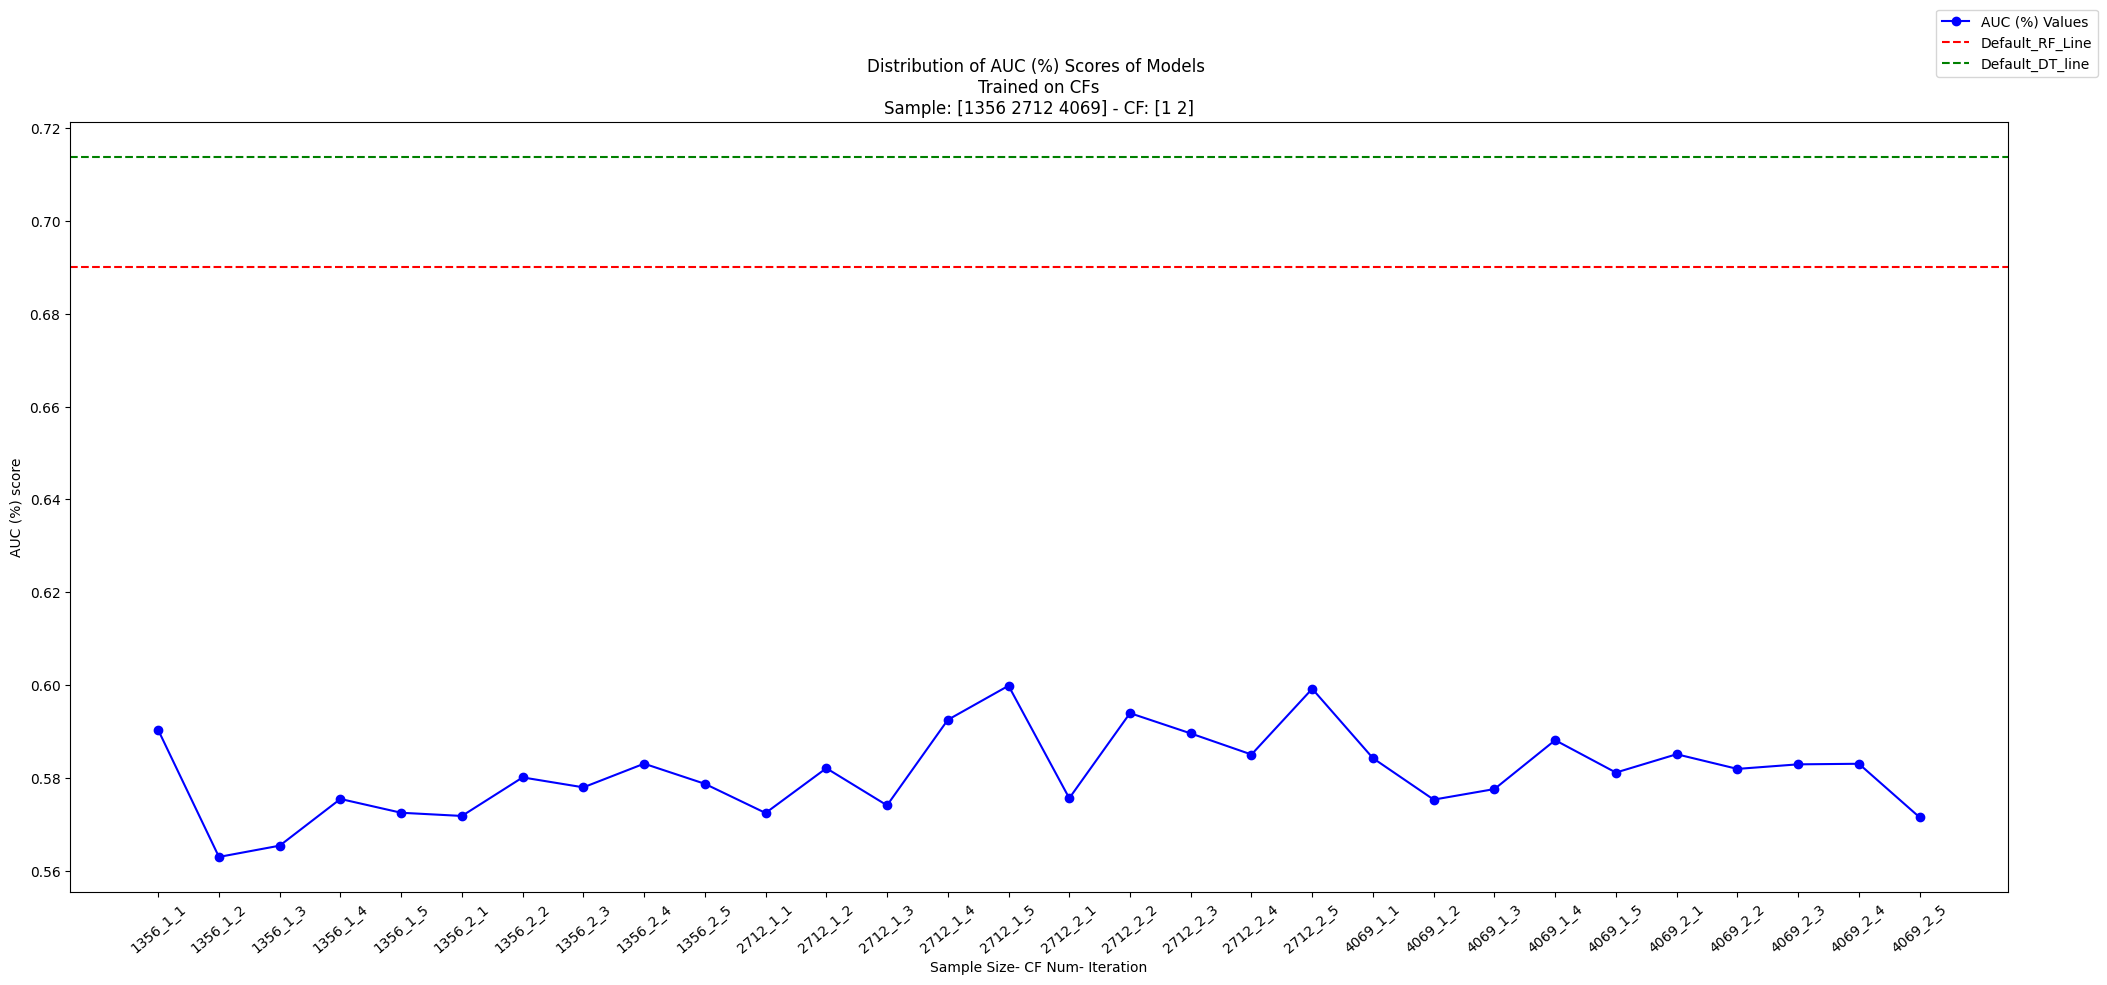

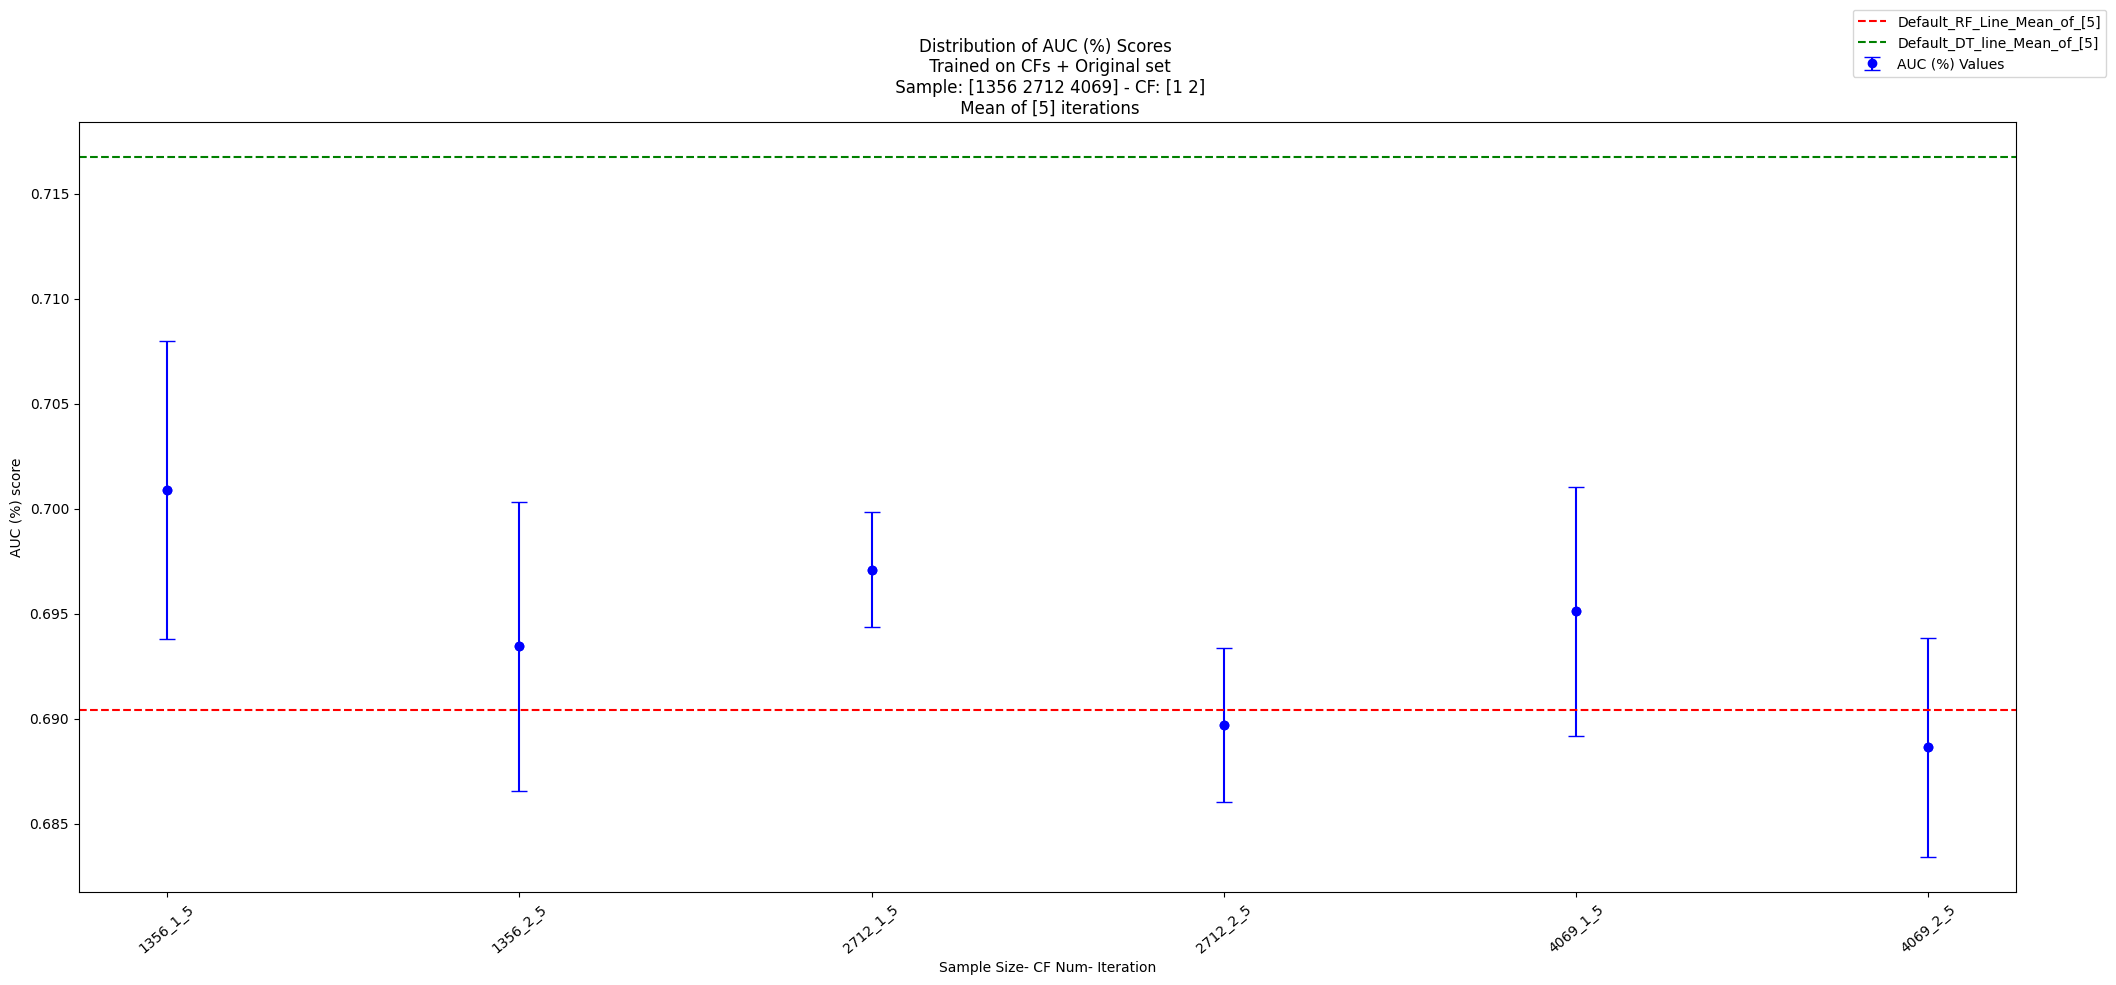

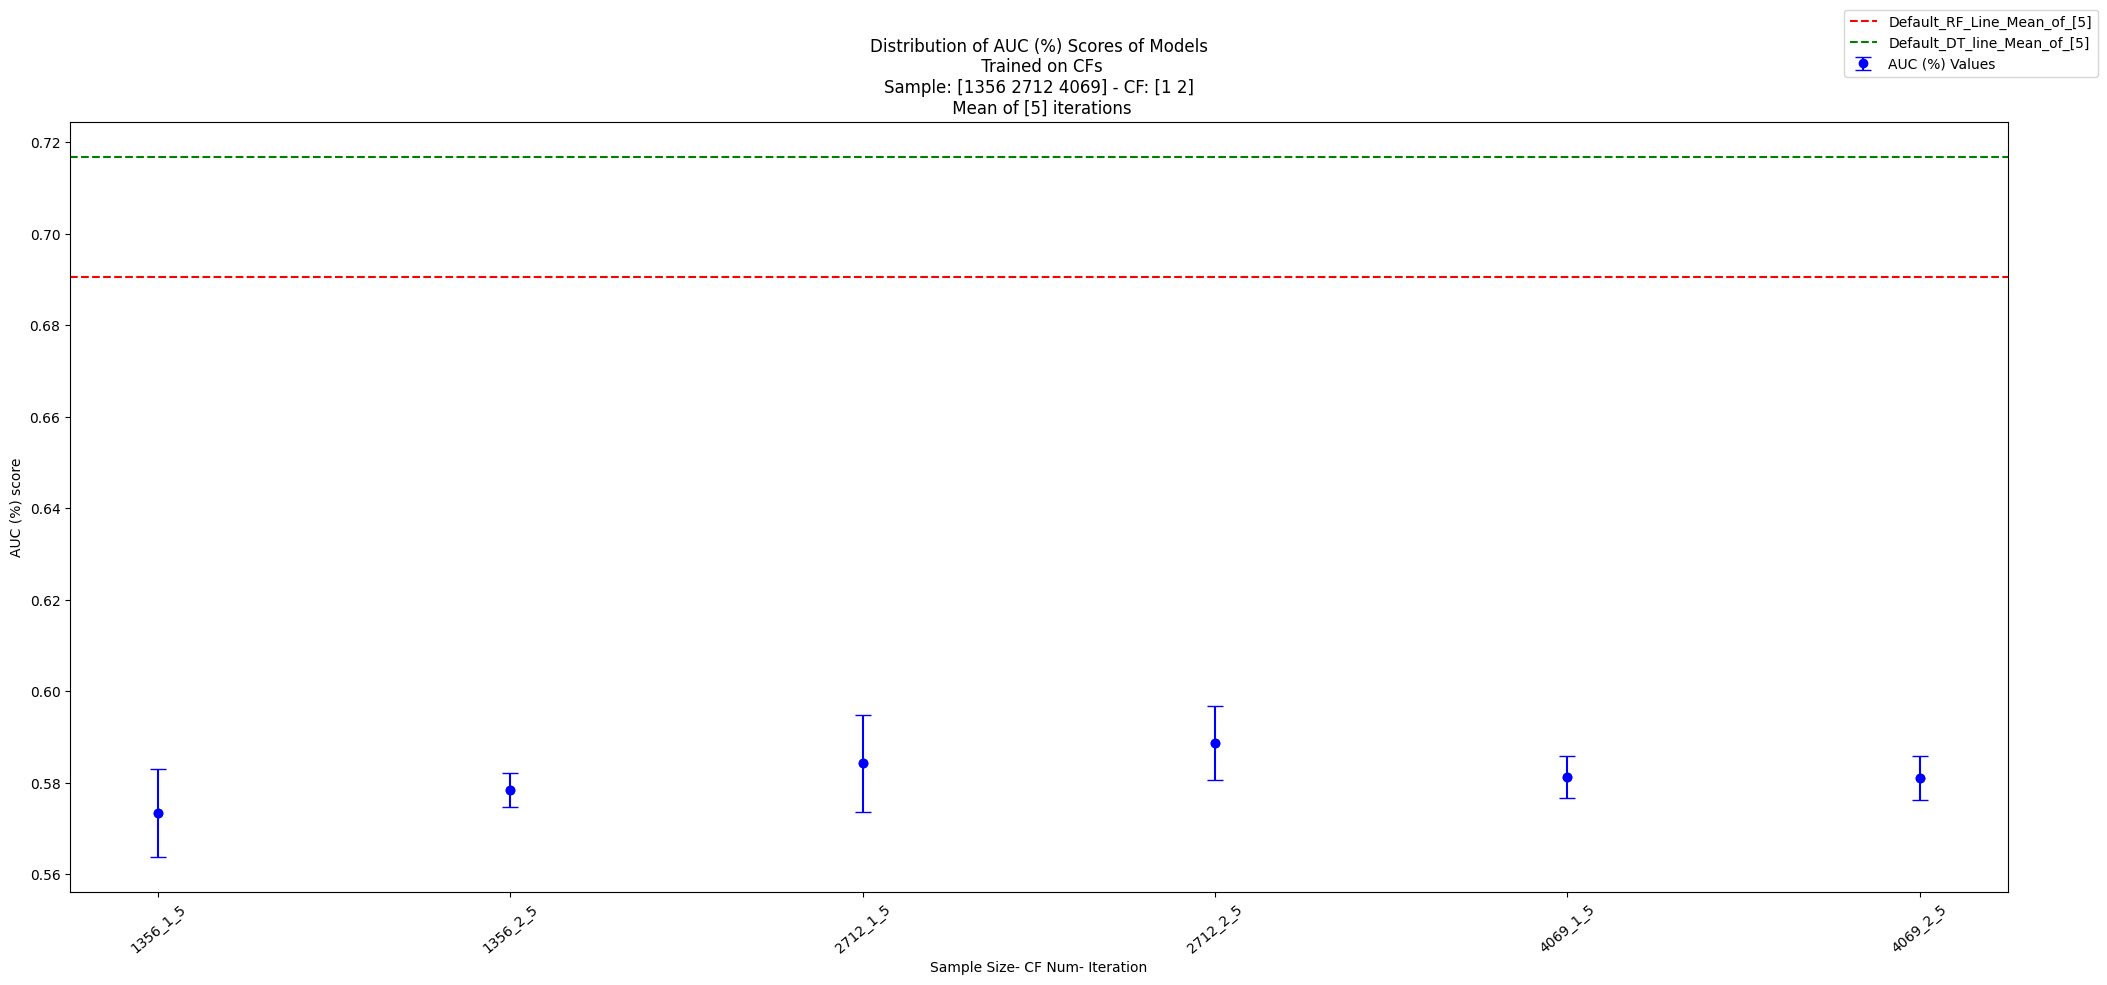

In [31]:
outcome_name = 'y'
fea_to_vary = 'all'
sample_size_list = [1356, 2712, 4069]
total_CFs_list = [1,2]
iteration_num = 5
list_of_plots = ['AUC (%)'] 

# Running the experiment
model_perf_metrics_merged_only_with_cfs, model_perf_metrics_merged, neww = running_exp(X_fit, y_fit, X_test, y_test,  sample_size_list, total_CFs_list, iteration_num, fea_to_vary, 'results ', list_of_plots, outcome_name)